In [1]:
#Import the necessary libraries for this project

import seaborn as sea

import numpy as np

import pandas as pa

#removes specific error popup for pandas usage
pa.options.mode.chained_assignment = None
pa.set_option('display.max_rows', None) #reformats tables to have scroll bars

import matplotlib
import matplotlib.pyplot as pyp

##Configures plot style
pyp.style.use('ggplot')

#configures matplotlib figure usage in Jupyter notebook
from matplotlib.pyplot import figure
%matplotlib inline

#Reading in the video game data
df = pa.read_csv(r'C:\Users\medeg\Documents\Video Games Data.csv')

#Taking a look at what the data looks like
df.head()

,Title,Platform,Year_Of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58


In [53]:
#Cleaning the data: removing 'Unknown' Publisher rows
temp_df = df[df['Publisher'] == 'Unknown'] #stores only rows with 'Unknown' Publisher
print("Number of rows with 'Unknown' Publisher: ", temp_df.shape[0])

Number of rows with 'Unknown' Publisher:  30


In [54]:
#Remove those 30 rows from the data
df = df[df['Publisher'] != 'Unknown']

In [55]:
# Check for null values in the entire DataFrame
nulls = (df.isnull()).sum()
print(nulls)

Title              0
Platform           0
Year_Of_Release    0
Genre              0
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
dtype: int64


In [56]:
#Remove the null row
df = df[df['Publisher'].notnull()]

#Check for and possibly remove duplicates
df.drop_duplicates(inplace=True)

<AxesSubplot:>

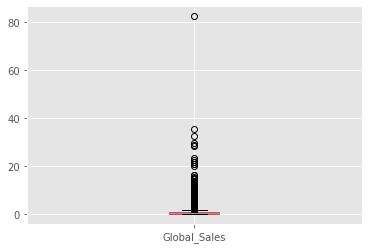

In [57]:
#There were no duplicate rows in the data

#Check for outliers in global sales using a boxplot
df.boxplot(column=['Global_Sales'])

In [58]:
#Order data by Global Sales to see what the outlier is
tempdf = df.sort_values(by=['Global_Sales'], inplace=False, ascending=False)
tempdf.head()

,Title,Platform,Year_Of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58


In [59]:
#Have to factorize the categorical data

factorizedDF = df.copy()

for category in factorizedDF.columns:
    if(factorizedDF[category].dtype == 'object'):
        factorizedDF[category] = factorizedDF[category].astype('category')
        factorizedDF[category] = (factorizedDF[category].cat).codes
        
factorizedDF.head()

,Title,Platform,Year_Of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score
0,4822,12,2006,10,185,41.36,28.96,3.77,8.45,82.53,76
1,2386,12,2008,6,185,15.68,12.76,3.79,3.29,35.52,82
2,4824,12,2009,10,185,15.61,10.93,3.28,2.95,32.77,80
3,2935,2,2006,4,185,11.28,9.14,6.50,2.88,29.80,89
4,4820,12,2006,3,185,13.96,9.18,2.93,2.84,28.92,58


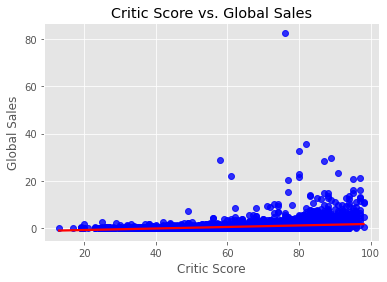

In [60]:
# # # Looking for Correlations # # #

#Starting with Critic Score vs. Global Sales

#Making a seaborn regression plot between the two variables
sea.regplot(x='Critic_Score', y='Global_Sales', data=factorizedDF, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

pyp.title('Critic Score vs. Global Sales')
pyp.xlabel('Critic Score')
pyp.ylabel('Global Sales')
pyp.show()

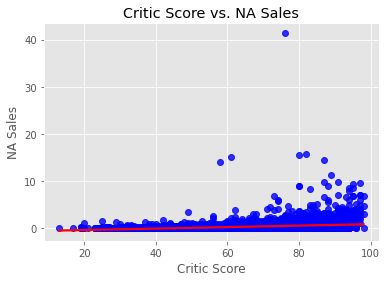

In [61]:
#Those two had a low positive correlation
#Checking if Critic Score has a larger correlation with North American Sales,
#as Metacritic is a North America-central site
sea.regplot(x='Critic_Score', y='NA_Sales', data=factorizedDF, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

pyp.title('Critic Score vs. NA Sales')
pyp.xlabel('Critic Score')
pyp.ylabel('NA Sales')
pyp.show()

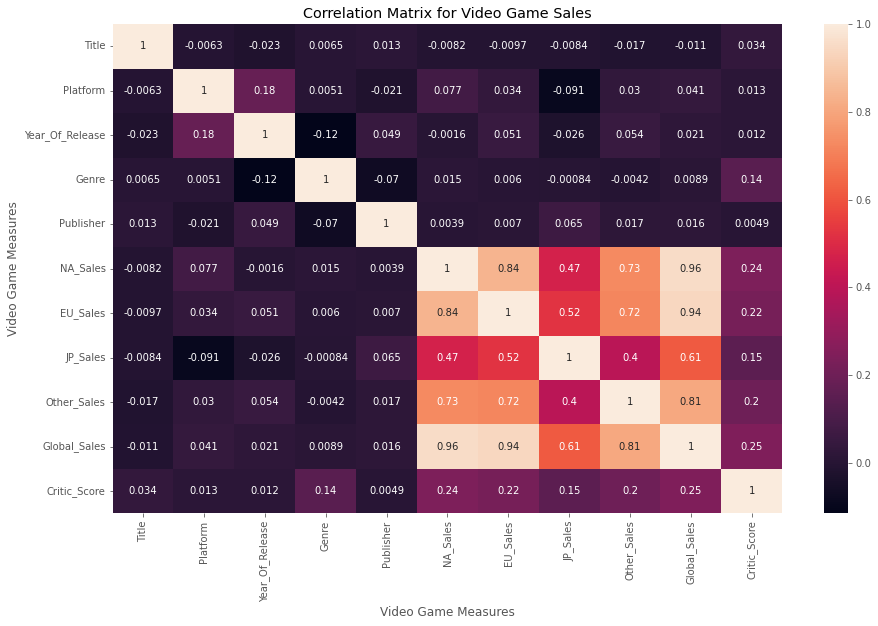

In [92]:
#Creating a Correlation Matrix to view all of our possible correlations
matplotlib.rcParams['figure.figsize'] = (15,9)

cm = factorizedDF.corr(method='pearson')

sea.heatmap(cm, annot=True)

pyp.title("Correlation Matrix for Video Game Sales")
pyp.xlabel("Video Game Measures")
pyp.ylabel("Video Game Measures")
pyp.show()

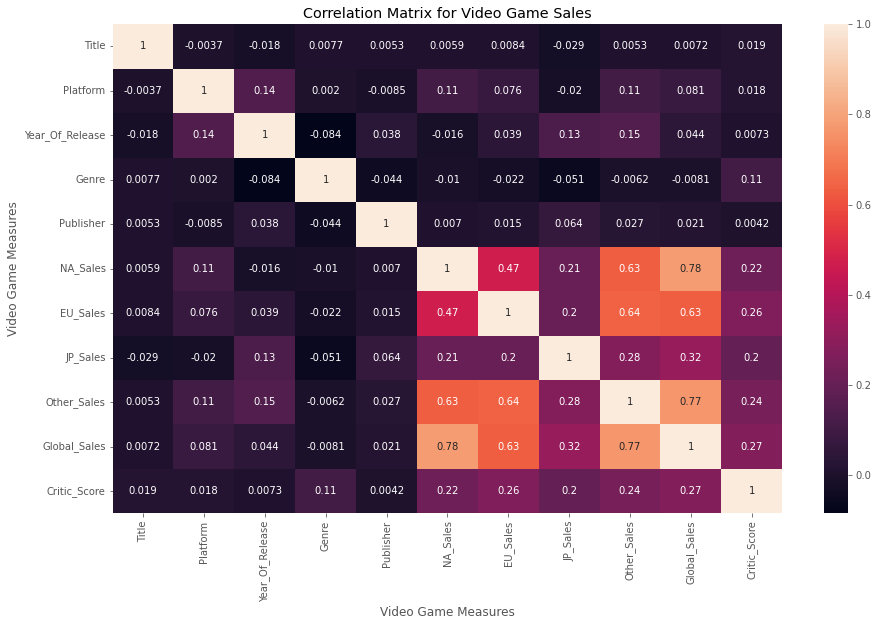

In [63]:
#Creating a Kendall Correlation Matrix
cm = factorizedDF.corr(method='kendall')
sea.heatmap(cm, annot=True)

pyp.title("Correlation Matrix for Video Game Sales")
pyp.xlabel("Video Game Measures")
pyp.ylabel("Video Game Measures")
pyp.show()

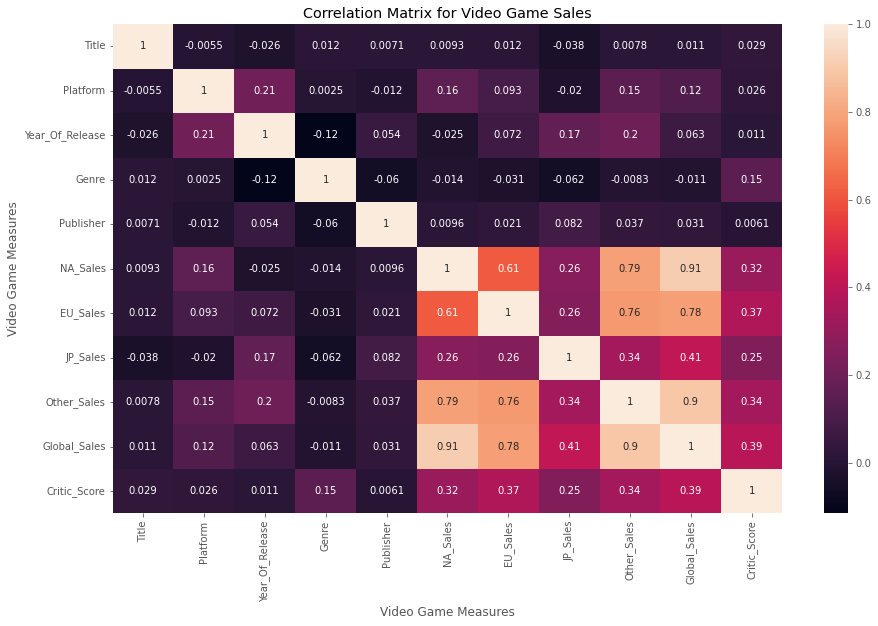

In [64]:
#Creating a Spearman Correlation Matrix
cm = factorizedDF.corr(method='spearman')
sea.heatmap(cm, annot=True)

pyp.title("Correlation Matrix for Video Game Sales")
pyp.xlabel("Video Game Measures")
pyp.ylabel("Video Game Measures")
pyp.show()

In [65]:
#Looking at Sorted Pairs

cm = factorizedDF.corr(method='spearman')
pairs = cm.unstack()
sorted_pairs = pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Genre            Year_Of_Release   -0.115057
Year_Of_Release  Genre             -0.115057
Genre            JP_Sales          -0.061647
JP_Sales         Genre             -0.061647
Publisher        Genre             -0.060393
Genre            Publisher         -0.060393
Title            JP_Sales          -0.038152
JP_Sales         Title             -0.038152
EU_Sales         Genre             -0.030974
Genre            EU_Sales          -0.030974
Title            Year_Of_Release   -0.026119
Year_Of_Release  Title             -0.026119
                 NA_Sales          -0.025390
NA_Sales         Year_Of_Release   -0.025390
JP_Sales         Platform          -0.020259
Platform         JP_Sales          -0.020259
Genre            NA_Sales          -0.013840
NA_Sales         Genre             -0.013840
Platform         Publisher         -0.011703
Publisher        Platform          -0.011703
Global_Sales     Genre             -0.010945
Genre            Global_Sales      -0.010945
          

In [66]:
#Filtering for higher correlations

strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.25]

print(strong_pairs)

Critic_Score     JP_Sales           0.250612
JP_Sales         Critic_Score       0.250612
EU_Sales         JP_Sales           0.257029
JP_Sales         EU_Sales           0.257029
NA_Sales         JP_Sales           0.264484
JP_Sales         NA_Sales           0.264484
NA_Sales         Critic_Score       0.315734
Critic_Score     NA_Sales           0.315734
Other_Sales      Critic_Score       0.336753
Critic_Score     Other_Sales        0.336753
Other_Sales      JP_Sales           0.341449
JP_Sales         Other_Sales        0.341449
EU_Sales         Critic_Score       0.371819
Critic_Score     EU_Sales           0.371819
                 Global_Sales       0.392669
Global_Sales     Critic_Score       0.392669
                 JP_Sales           0.414901
JP_Sales         Global_Sales       0.414901
NA_Sales         EU_Sales           0.612944
EU_Sales         NA_Sales           0.612944
                 Other_Sales        0.764932
Other_Sales      EU_Sales           0.764932
EU_Sales  

In [84]:
#According to the Spearman Correlation Method, Critic Score has a medium positive correlation with all categories of Sales

#Sorting Publishers by Global Sales

PublisherSales = df.groupby('Publisher')[['Global_Sales']].sum()

PublisherSalesSorted = PublisherSales.sort_values('Global_Sales', ascending=False)[:10]

PublisherSalesSorted

,Global_Sales
Publisher,
Electronic Arts,894.18
Nintendo,857.91
Activision,551.58
Sony Computer Entertainment,400.60
Take-Two Interactive,355.25
Ubisoft,350.67
Microsoft Game Studios,217.55
THQ,193.73
Sega,154.11


In [82]:
#Resorting for Sales in Japan

JPSales = df.groupby('Publisher')[['JP_Sales']].sum()
JPSalesSorted = JPSales.sort_values('JP_Sales', ascending=False)[:5]
JPSalesSorted

,JP_Sales
Publisher,
Nintendo,175.39
Sony Computer Entertainment,40.60
Square Enix,34.48
Namco Bandai Games,25.99
Capcom,25.97


In [78]:
#Looking at average Critic Score per Publisher

avg_scores = (df.groupby('Publisher')['Critic_Score']).mean()
scoresSorted = avg_scores.sort_values(ascending=False)[:15]
print(scoresSorted)

Publisher
Valve                     95.000000
Valve Software            93.000000
Blue Byte                 91.000000
2D Boy                    90.000000
Graphsim Entertainment    90.000000
Number None               90.000000
Psygnosis                 89.750000
Square                    89.000000
Havas Interactive         88.000000
Devolver Digital          88.000000
Activision Blizzard       87.000000
GT Interactive            86.666667
Yacht Club Games          86.250000
Russel                    86.000000
GOA                       86.000000
Name: Critic_Score, dtype: float64


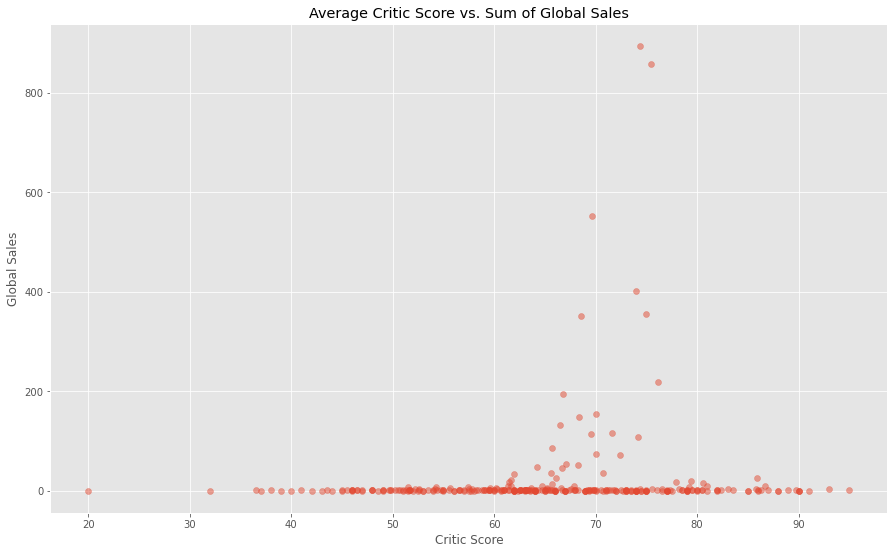

In [91]:
#Looking at Correlation between a Publisher's average critic score and their global sales

sales = df.groupby('Publisher')[['Global_Sales']].sum()
scores = (df.groupby('Publisher')['Critic_Score']).mean()

mergedDF = pa.merge(sales, scores, left_index=True, right_index=True)

pyp.scatter(x=mergedDF['Critic_Score'], y=mergedDF['Global_Sales'], alpha=0.5)

pyp.title('Average Critic Score vs. Sum of Global Sales')
pyp.xlabel('Critic Score')
pyp.ylabel('Global Sales')
pyp.show()

In [89]:
#Correlation Value
mergedDF.corr(method='pearson')

,Global_Sales,Critic_Score
Global_Sales,1.000000,0.109877
Critic_Score,0.109877,1.000000
